# Derivadas sucesivas

## Definición

Vamos a suponer que tenemos una función $f:(a,b) \longrightarrow \mathbb R$, derivable en $(a,b)$. Podemos considerar, entonces, su función derivada en $(a,b)$:

   \begin{equation*}
   \begin{array}{cccc}
   f': & (a,b) & \longrightarrow & \mathbb{R} \\
      &   x   &   \leadsto      & f'(x)
   \end{array}
   \end{equation*}

````{prf:definition} 
:label: def_derivada_segunda
:nonumber: 

Dado un punto $x_0 \in (a,b)$ definimos la **derivada segunda** de $f$ en $x_0$ como la derivada de $f'$ en $x_0$, es decir, como el siguiente límite:
 
 \begin{equation*}
    f''(x_0) =(f')'(x_0) = \lim_{h\rightarrow 0} \dfrac{f'(x_0+h) - f'(x_0)}{h}.
 \end{equation*}
 Si este límite existe y es finito, se dice que $f$ es derivable dos veces en $x_0$.
````

````{prf:definition} 
:label: def_derivadas_sucesivas
:nonumber: 

 Si $f$ admite derivada segunda en todo punto de $(a,b)$ definimos su **derivada tercera** en $x_0$ como el límite, si existe,
 
   \begin{equation*}
      f'''(x_0) =(f'')'(x_0) = \lim_{h\rightarrow 0} \dfrac{f''(x_0+h) - f''(x_0)}{h}.
   \end{equation*}
 Así podríamos definir la derivada cuarta, etc. En general, una vez que se tiene $f^{n-1}:(a,b) \longrightarrow \mathbb R$, definimos la **derivada n-ésima en $x_{0}$** como: 
 
   \begin{equation*}
   f^{n}(x_0) = \left( f^{(n-1)}\right)'(x_0).
   \end{equation*}
 ````

Por ejemplo, si partimos de una función sencilla,
* $f(x) = \sin(x)+x^2$,
* $f'(x) = \cos(x) + 2x$,
* $f''(x) = -\sin(x) + 2$,
* $f'''(x) = - \cos(x)$,
* etc.


## Derivadas sucesivas en `Sympy`

Para calcular derivadas sucesivas en `Sympy` tenemos que añadir un parámetro en `sp.diff` que indique el número de veces que queremos derivar:

In [2]:
import sympy as sp

x = sp.symbols('x', real=True)
f_exp = sp.sin(x) + x**2
print('Expresión que queremos derivar: ',f_exp)
print('Primera derivada: ',sp.diff(f_exp,x))
print('Segunda derivada: ',sp.diff(f_exp,x,2))
print('Tercera derivada: ',sp.diff(f_exp,x,3))
# Nota: también se puede usar la siguiente escritura:
# print(f_exp.diff(x,3))

Expresión que queremos derivar:  x**2 + sin(x)
Primera derivada:  2*x + cos(x)
Segunda derivada:  2 - sin(x)
Tercera derivada:  -cos(x)


## Clase de una función. Ejemplo

````{prf:definition} Clase de una función
:label: def_clase_funcion 
:nonumber: 

Sea $f:(a,b) \longrightarrow \mathbb R$. Diremos que
1. $f$ es de clase $n$ en $(a,b)$, $f \in \mathcal{C}^n(a,b)$, si existen las $n$ primeras derivadas de $f$, $f'$, $f''$, $\ldots$, $f^{(n}$, y además $f^{(n}$ es una función continua,
2. $f$ es de clase $0$ en $(a,b)$, $f\in\mathcal{C}^0(a,b)$, si $f$ es continua,
3. $f$ es de clase $\infty$ en (a,b), $f \in \mathcal{C}^\infty(a,b)$, si $f\in\mathcal{C}^n(a,b), \forall n\in\mathbb N$,
4. $f$ es de clase $n$ en $[a,b]$, $f \in \mathcal{C}^n[a,b]$,si existe $(c,d)\supset [a,b]$ tal que $f\in\mathcal{C}^n(c,d)$.
````

Veamos un ejercicio/ejemplo completo para practicar:

````{prf:example} 
:label: ex_clase_funcion
:nonumber: 

Sea la función $f(x) = \dfrac{1}{2} x |x|$, $\forall x\in\mathbb R$. ¿Cuál es la clase de $f$ en $\mathbb R$?
````

**Respuesta:** En primer lugar, separamos el valor absoluto según lo de dentro sea positivo o negativo,

$$
f(x)=\left\{
\begin{array}{cl}
-\frac{1}{2}x^2&\quad\mbox{si }x<0, \\
\frac{1}{2}x^2&\quad\mbox{si }x\geq 0.
\end{array}\right.
$$
La representación gráfica de $f$ en `Sympy` se puede obtener del siguiento modo:

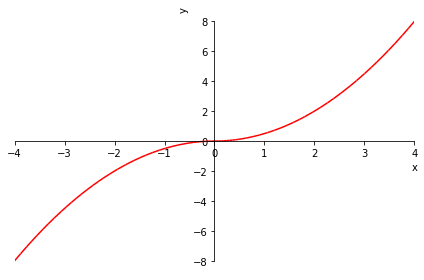

In [7]:
f_expr = 0.5*x*sp.Abs(x)
p = sp.plot(f_expr, (x, -4, 4), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

Ahora vamos a comprobar si $f$ es una función continua. Es evidente que $f$ es continua en todo punto $x$ distinto del $0$, ya que para $x<0$ y para $x>0$ $f$ es un polinomio. El $0$ es un punto que debemos estudiar con más cuidado, ya que en él se produce un cambio en la definición de $f$. Calculamos sus límites laterales,

\begin{eqnarray*}
&&\lim_{x\to 0^{-}}f(x)=\lim_{x\to 0^{-}}-\frac{1}{2}x^2=0=f(0), \\
&&\lim_{x\to 0^{+}}f(x)=\lim_{x\to 0^{+}}\frac{1}{2}x^2=0=f(0).
\end{eqnarray*}
Como los dos límites coinciden con el valor de la función en ese punto, ya sabemos que $f$ es continua en $0$ y, por tanto, continua en todo $\mathbb R$. Entonces 

$$\fbox{$f\in\mathcal{C}^0(\mathbb R).$}$$

In [8]:
f = sp.Lambda(x, f_expr)
display(sp.limit(f(x),x,0,dir='-'))
display(sp.limit(f(x),x,0,dir='+'))
print('f es de clase 0?', sp.limit(f(x),x,0) == f(0))

0

0

f es de clase 0? True


Vamos a calcular ahora la derivada de $f$. El $0$ es el punto problemático. Estudiamos $f'(0)$ en primer lugar, calculando sus derivadas laterales:

\begin{eqnarray*}
&&f'(0^{-})=\lim_{h\to 0^{-}}\frac{f(h)-f(0)}{h}=\lim_{h\to
0^{-}}\frac{-\frac{1}{2}h^2-0}{h}=\lim_{h\to 0^{-}}-\frac{1}{2}h^2=0, \\
&&f'(0^{+})=\lim_{h\to 0^{+}}\frac{f(h)-f(0)}{h}=\lim_{h\to
0^{+}}\frac{\frac{1}{2}h^2-0}{h}=\lim_{h\to 0^{+}}\frac{1}{2}h^2=0.
\end{eqnarray*}
Como las derivadas laterales coinciden, sabemos que $f'$ es una función derivable en el $0$ y que $f'(0)=0$. En el resto de puntos es muy sencillo derivar, porque $f$ es un polinomio. Resulta entonces,

$$
f'(x)=\left\{
\begin{array}{cl}
-x&\quad\mbox{si }x<0, \\
0&\quad\mbox{si }x=0, \\
x&\quad\mbox{si }x\geq 0.
\end{array}\right.
$$
Es muy sencillo comprobar que $f'$ es una función continua. Entonces 

$$\fbox{$f\in\mathcal{C}^1(\mathbb R).$}$$
La representación gráfica de $f'$ se obtiene del siguiente modo.

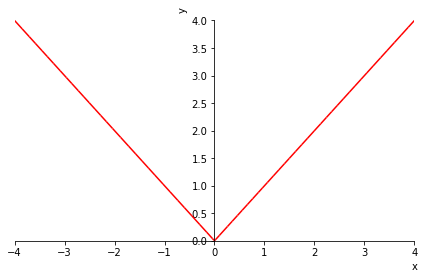

In [9]:
p = sp.plot(f_expr.diff(x,1), (x, -4, 4), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

Ahora intentamos calcular la derivada segunda de $f$. Comenzamos con el punto problemático, $x=0$, calculando sus derivadas laterales.

\begin{eqnarray*}
&&f''(0^{-})=\lim_{h\to 0^{-}}\frac{f'(h)-f'(0)}{h}=\lim_{h\to
0^{-}}\frac{-h-0}{h}=\lim_{h\to 0^{-}}-1=-1, \\
&&f''(0^{+})=\lim_{h\to 0^{+}}\frac{f'(h)-f'(0)}{h}=\lim_{h\to
0^{+}}\frac{h-0}{h}=\lim_{h\to 0^{+}}1=1.
\end{eqnarray*}
Como las derivadas laterales no coinciden, resulta que $\not\exists f''(0)$. Por lo tanto 

$$\fbox{$f\not\in\mathcal{C}^2(\mathbb R).$}$$
Con la ayuda de Sympy podríamos analizarlo del siguiente modo:

In [12]:
f1_expr = f_expr.diff(x,1)
f1 = sp.Lambda(x, f1_expr)

h = sp.symbols('h', real=True)
f2_0Minus = sp.limit((f1(h)-f1(0))/h,h,0,dir='-')
f2_0Plus = sp.limit((f1(h)-f1(0))/h,h,0,dir='+')
print('f2_0Minus = ', f2_0Minus, ', f2_0Plus = ', f2_0Plus) 
print('Existe f\'\'(0)?',f2_0Minus==f2_0Plus)

f2_0Minus =  -1.00000000000000 , f2_0Plus =  1.00000000000000
Existe f''(0)? False
